In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
p_h = 0.4

In [3]:
states = list(range(101))

In [4]:
rewards = [0,1]

In [5]:
actions = []
for s in states:
    if s < 100 and s > 0:
        A_s = list(range(min(s,100-s)+1))
    else: A_s = [0]
    actions.append(A_s)

In [6]:
actions[1]

[0, 1]

In [7]:
def p(s_prime,r,s,a):
    if  (s==100 and s_prime==100 and r==0) or (s == 0 and s_prime==0 and r==0):
        return 1.0
    elif (s_prime == s+a and (a in actions[s]) and s_prime<100 and r == 0):
        return p_h
    elif (s_prime == s+a and (a in actions[s]) and s < 100 and s_prime==100 and r == 1):
        return p_h
    elif (s_prime == s-a and (a in actions[s]) and s_prime>0 and r == 0):
        return 1-p_h
    elif (s_prime == s-a and (a in actions[s]) and s_prime==0 and r == 0):
        return 1-p_h
    else:
        return 0.0


In [8]:
def pi(a,s):
    if a in actions[s]:
        return 1/len(actions[s])
    else: return 0.0

In [129]:
def B(v):
    w = [np.sum([pi(a,s)*p(s_prime,r,s,a)*(r+v[s_prime]) for s_prime in states \
           for r in rewards for a in actions[s] ]) for s in states]
    w[0] = 0
    w[100] = 0
    
    return w

In [130]:
v_0 = np.zeros(101)

In [131]:
w = B(v_0)

In [132]:
s = 99
actions[s]
pi(1,s)

0.5

In [133]:
p(100,1,99,1)

0.4

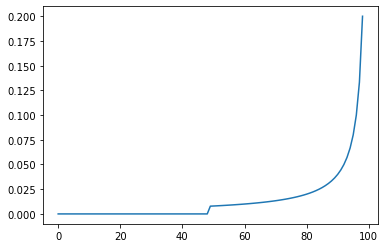

In [134]:
plt.plot(w[1:100]);

In [135]:
eps = 1 
w = v_0
while eps > 0.000001:
    
    v = B(w)
    eps = (np.array([(v[s] - w[s])**2 for s in states ])).sum()

    w = v
    print(eps)

0.10008275218144394
0.0601938424036695
0.045368339243608516
0.03456124544088787
0.02582750055592982
0.01893470112893298
0.013678724988618472
0.009777738042095951
0.0069374087298778465
0.004896610994025015
0.0034436292109095924
0.002415661017848923
0.0016915556214453552
0.00118303770404016
0.0008266740889882101
0.0005773062391865553
0.00040298897238514036
0.00028122254911872393
0.00019620753676714535
0.00013687265622575357
9.547110629334025e-05
6.658778645781115e-05
4.644016123962312e-05
3.238737661314365e-05
2.2586306034541665e-05
1.575089250250101e-05
1.0983932650365372e-05
7.65957831831104e-06
5.341303985005459e-06
3.7246544306726794e-06
2.5972965684637894e-06
1.811150024984904e-06
1.2629466307163169e-06
8.806706972677679e-07


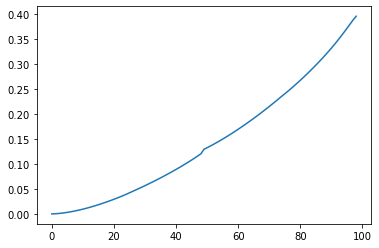

In [136]:
plt.plot(v[1:100]);

In [137]:
v[48:52]

[0.1159884455159527,
 0.12026834625801969,
 0.1293254508681712,
 0.132427781630988]

In [138]:
def q(s,a):
    return np.sum([p(s_prime,r,s,a)*(r + v[s_prime]) for s_prime in states for r in rewards])

In [139]:
q_val = [q(s,min(s,100-s)) for s in range(1,100)]

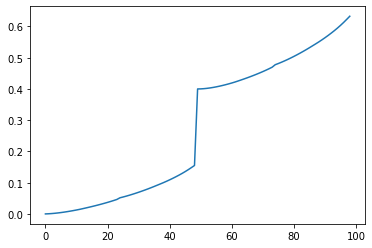

In [140]:
plt.plot(q_val);

In [141]:
eps = 1

while eps>0.000001:
    
    def q(s,a):
        return np.sum([p(s_prime,r,s,a)*(r + v[s_prime]) for s_prime in states for r in rewards])
    
    new_v =  np.array([np.max([q(s,a) for a in actions[s]]) for s in states]) 
    new_v[0]=0
    new_v[100]=0
    eps = np.sum((v - new_v)**2)
    print(eps)
    v = new_v

2.9695280311344767
0.7738906406746513
0.19254675696133525
0.050317715889442956
0.013199267375671203
0.0029706310019005605
0.0007189647592518516
0.00017665243139349383
4.325124401205664e-05
1.271319466991231e-05
3.4490795781870795e-06
9.04450578415219e-07


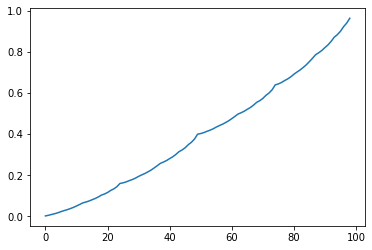

In [142]:
plt.plot(v[1:100]);

In [143]:
opt_actions = [actions[s][np.argmax([round(q(s,a),5) for a in actions[s]])] for s in range(1,100)]

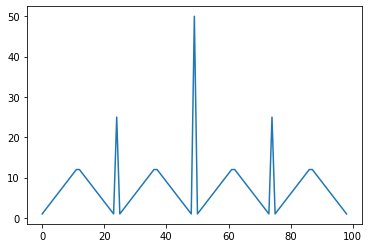

In [144]:
plt.plot(opt_actions)

In [149]:
opt_actions[25]

1

In [ ]:
eps = 1
while eps > 0.01:
    new_v = [np.max([q(s,a) for a in actions[s]]) for s in states]
    new_q = [[np.sum([p(s_prime,r,s,a)*(r + new_v[s_prime]) for s_prime in states for r in rewards]) for a in actions[s]] for s in states]
    new_q = np.argmax([new_q(s,a) ])
    eps = np.sum([(v[s] - new_v[s])**2 for s in states])
    q = new_q
    v = new_v
